In [6]:
# -*- coding: utf-8 -*-
import pandas as pd

In [7]:
df = pd.read_csv(
    r"retail_sales_dataset.csv"
)

In [8]:
# Checking data type of each column
print(df.dtypes)

Transaction ID        int64
Date                 object
Customer ID          object
Gender               object
Age                   int64
Product Category     object
Quantity              int64
Price per Unit        int64
Total Amount        float64
dtype: object


In [10]:
# Creating a training set
app_train = pd.read_csv(
    r"retail_sales_dataset.csv"
)
print("Training data size: ", app_train.shape)

Training data size:  (1000, 9)


In [11]:
# Creating a test set
app_test = pd.read_csv(
    r"retail_sales_dataset.csv"
)
print("Testing data size: ", app_test.shape)

Testing data size:  (1000, 9)


In [14]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}
    )
    mis_val_table_ren_columns = (
        mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )

    print(
        "Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are "
        + str(mis_val_table_ren_columns.shape[0])
        + " columns that have missing values."
    )

    return mis_val_table_ren_columns

In [15]:
# Calling the missing_values_table function to locate colimes with missing values. However, I have already converted NaN to mean values above
missing_values = missing_values_table(df)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


In [20]:
# Using fillna() to fill in missing values with the mean in the column. Verified in .csv file
df.fillna(df["Total Amount"].mean(), inplace=True)

In [21]:
# Verifying the value has been replaced by the df = df.fillna(df.mean()) line
print(df.head(5))

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  11/24/2023     CUST001    Male   34           Beauty   
1               2   2/27/2023     CUST002  Female   26         Clothing   
2               3   1/13/2023     CUST003    Male   50      Electronics   
3               4   5/21/2023     CUST004    Male   37         Clothing   
4               5    5/6/2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50    456.306306  
1         2             500   1000.000000  
2         1              30     30.000000  
3         1             500    500.000000  
4         2              50    100.000000  


<Axes: title={'center': 'Total Sales by Product'}, xlabel='Product', ylabel='Total Amount'>

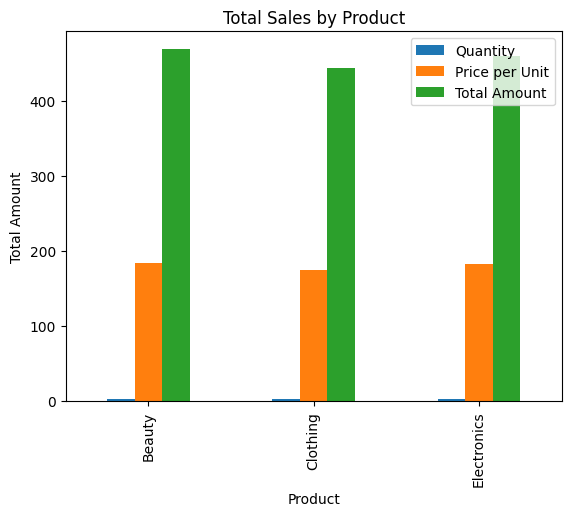

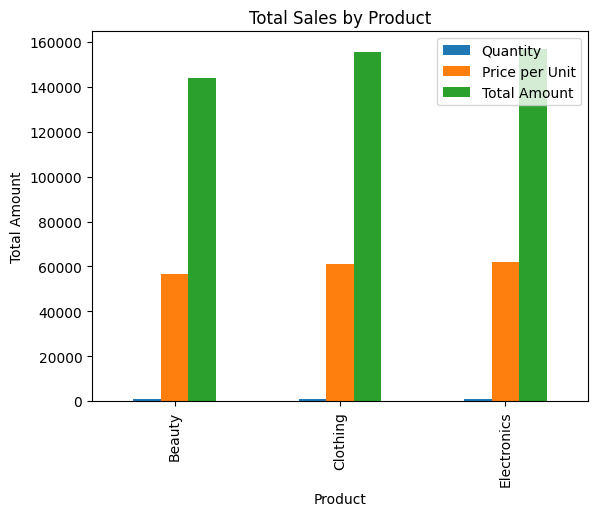

In [24]:
# Creating new product DataFrame and grouping by product
product_df = df[["Product Category", "Quantity", "Price per Unit", "Total Amount"]]
product_total = product_df.groupby("Product Category").sum()
product_mean = product_df.groupby("Product Category").mean()
product_mean.plot(
    kind="bar", title="Total Sales by Product", ylabel="Total Amount", xlabel="Product"
)
product_total.plot(
    kind="bar", title="Total Sales by Product", ylabel="Total Amount", xlabel="Product"
)